# Logisitc Regression

We download and import the needed modules

In [1]:
!pip -q install tensorflow
!pip -q install scikit-learn
!pip -q install pandas
!pip -q install numpy
!pip -q install matplotlib

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

We check our tensorflow version

In [4]:
if tf.__version__:
    print(tf.__version__)

2.16.1


We load the iris dataset and split it for testing and training

In [5]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [6]:
numFeatures = trainX.shape[1]
print('numFeatures is : ', numFeatures )
numLabels = trainY.shape[1]
print('numLabels is : ', numLabels )

numFeatures is :  4
numLabels is :  3


We set our constant tensors from our data

In [7]:
trainX = tf.constant(trainX, dtype='float32')
trainY = tf.constant(trainY, dtype='float32')
testX = tf.constant(testX, dtype='float32')
testY = tf.constant(testY, dtype='float32')

As our model is set as:

$$\theta (y) = \dfrac{1}{1+e^{-y}}$$

$$y = w0 + w1 \cdot x1 + w2 \cdot x2 + \cdots$$

for each predictor $x_i$ setting a weight value $w_i$

We set out weight variables and constant b

In [8]:
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [9]:
weights = tf.Variable(tf.random.normal([numFeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))


We apply the logistic function

In [10]:
def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

We set our model (We set our loss function as MSE)

In [11]:
numEpochs = 700

learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [12]:
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)

In [13]:
# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

We define the Gradient descence optimizer

In [14]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

We train our model

In [15]:
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(trainX, trainY)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(testX)

            newLoss = loss_object(pred, testY)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, testY)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

            
print("final accuracy on test set: %s" %acc.numpy())

step 0, training accuracy 0.3, loss 0.131997, change in loss 0.131997
step 10, training accuracy 0.3, loss 0.131463, change in loss 0.000533313
step 20, training accuracy 0.3, loss 0.130939, change in loss 0.000524864
step 30, training accuracy 0.3, loss 0.130422, change in loss 0.000516474
step 40, training accuracy 0.3, loss 0.129914, change in loss 0.000508159
step 50, training accuracy 0.3, loss 0.129414, change in loss 0.000499859
step 60, training accuracy 0.3, loss 0.128922, change in loss 0.000491664
step 70, training accuracy 0.3, loss 0.128439, change in loss 0.000483498
step 80, training accuracy 0.3, loss 0.127964, change in loss 0.000475422
step 90, training accuracy 0.3, loss 0.127496, change in loss 0.000467435
step 100, training accuracy 0.3, loss 0.127041, change in loss 0.000454962
step 110, training accuracy 0.3, loss 0.126612, change in loss 0.000429302
step 120, training accuracy 0.3, loss 0.12619, change in loss 0.000422299
step 130, training accuracy 0.3, loss 0.

We plot our loss function value after each epoch

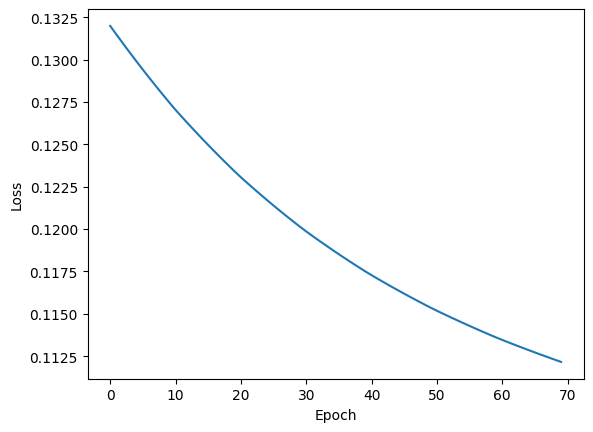

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()

Created by: <a href="https://linkedin.com/in/romeo-kienzler-089b4557"> Romeo Kienzler </a>, <a href="https://br.linkedin.com/in/walter-gomes-de-amorim-junior-624726121">Saeed Aghabozorgi</a> , <a href="https://br.linkedin.com/in/walter-gomes-de-amorim-junior-624726121">Walter Gomes de Amorim Junior</a> ,  Victor Barros Costa